In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
dl=pd.read_csv('delivery_time.csv')

In [ ]:
dl

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dl.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [ ]:
dl.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

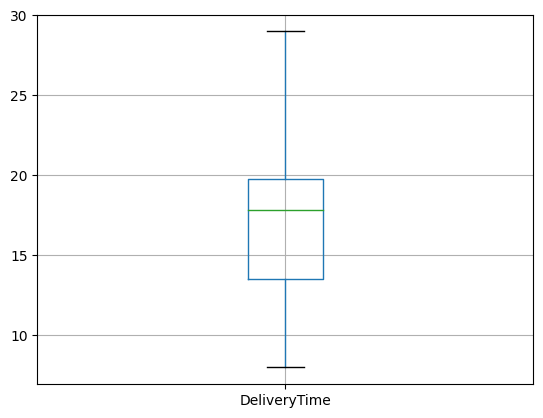

In [ ]:
dl.boxplot(column='DeliveryTime')

<Axes: >

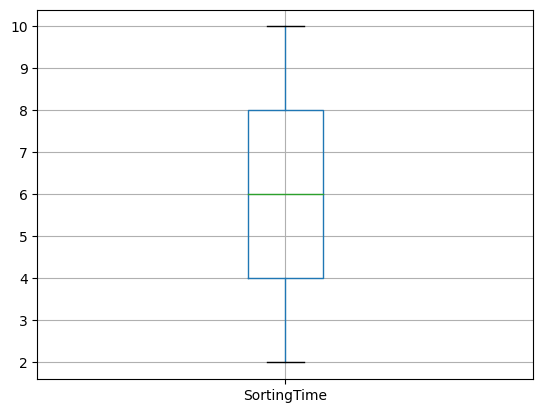

In [ ]:
dl.boxplot(column='SortingTime')

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

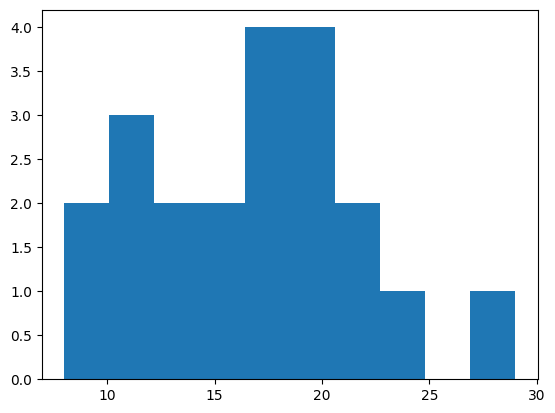

In [ ]:
plt.hist(dl.DeliveryTime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

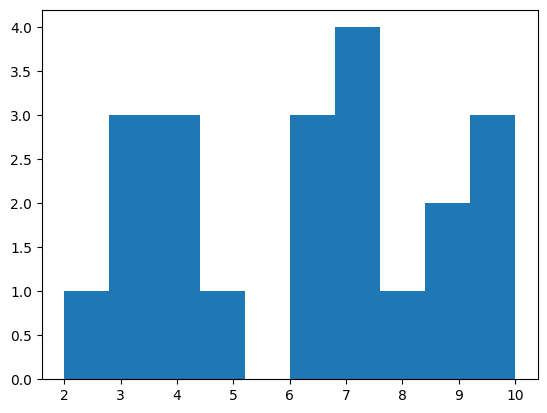

In [ ]:
plt.hist(dl.SortingTime)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols('DeliveryTime~SortingTime',data=dl).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        10:19:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
model_pre=model.predict(dl['SortingTime'])
model_pre

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

Text(0, 0.5, 'DELIVERYTIME')

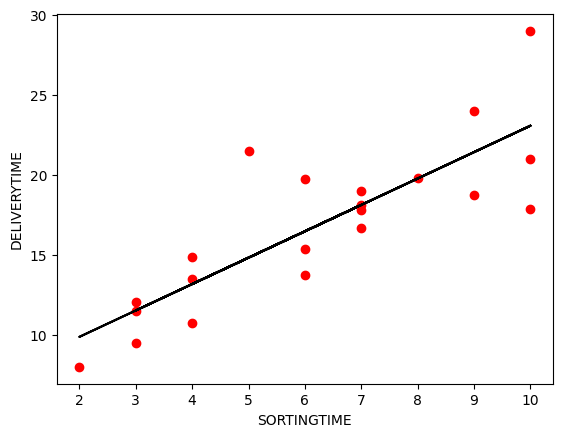

In [ ]:
plt.scatter(dl['SortingTime'],dl['DeliveryTime'],color='red')
plt.plot(dl['SortingTime'],model_pre,color='black')
plt.xlabel('SORTINGTIME')
plt.ylabel('DELIVERYTIME')

In [ ]:
model_log=smf.ols('DeliveryTime~np.log(SortingTime)',data=dl).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.64e-06
Time:                        10:46:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_exp=smf.ols('np.log(DeliveryTime)~SortingTime',data=dl).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 08 Apr 2024   Prob (F-statistic):           1.59e-06
Time:                          10:30:38   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_exp_pre=model_exp.predict(dl['SortingTime'])
model_exp_pre1=np.exp(model_exp_pre)
model_exp_pre1

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'DELIVERYTIME')

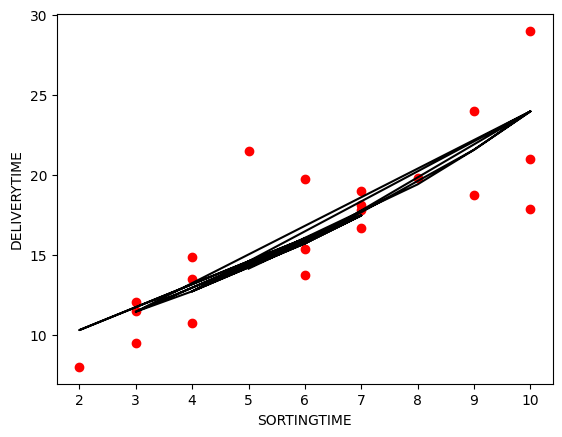

In [ ]:
plt.scatter(dl.SortingTime,dl.DeliveryTime,color='red')
plt.plot(dl.SortingTime,model_exp_pre1,color='black')
plt.xlabel('SORTINGTIME')
plt.ylabel('DELIVERYTIME')

In [ ]:
dl['SortingTime_sq']=dl.SortingTime*dl.SortingTime

In [ ]:
dl

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [ ]:
model_exp2=smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq',data=dl).fit()
model_exp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 08 Apr 2024   Prob (F-statistic):           2.20e-06
Time:                          10:54:04   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_exp2_pre=model_exp.predict(dl['SortingTime'])
model_exp2_pre1=np.exp(model_exp2_pre)
model_exp2_pre1

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'DELIVERYTIME')

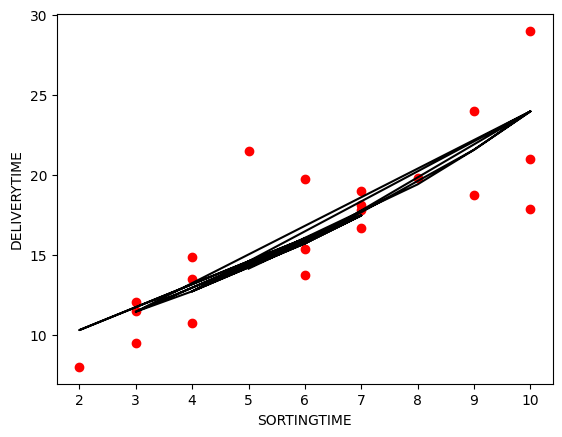

In [ ]:
plt.scatter(dl.SortingTime,dl.DeliveryTime,color='red')
plt.plot(dl.SortingTime,model_exp2_pre1,color='black')
plt.xlabel('SORTINGTIME')
plt.ylabel('DELIVERYTIME')

In [ ]:
dl['SortingTime_cb']=dl.SortingTime*dl.SortingTime*dl.SortingTime

In [ ]:
model_exp3=smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq+SortingTime_cb',data=dl).fit()
model_exp3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.782
Model:                              OLS   Adj. R-squared:                  0.743
Method:                   Least Squares   F-statistic:                     20.31
Date:                  Mon, 08 Apr 2024   Prob (F-statistic):           7.37e-06
Time:                          11:03:31   Log-Likelihood:                 10.748
No. Observations:                    21   AIC:                            -13.50
Df Residuals:                        17   BIC:                            -9.317
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0716      0.591      1.814      0.087      -0.175       2.318
SortingTime        0.6495      0.343      1.896      0.075      -0.073       1.372
SortingTime_sq    -0.0809      0.059     -1.361      0.191      -0.206       0.045
SortingTime_cb     0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dl['SortingTime_qu']=dl.SortingTime*dl.SortingTime*dl.SortingTime*dl.SortingTime
model_exp4=smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq+SortingTime_cb+SortingTime_qu',data=dl).fit()
model_exp4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.783
Model:                              OLS   Adj. R-squared:                  0.728
Method:                   Least Squares   F-statistic:                     14.39
Date:                  Mon, 08 Apr 2024   Prob (F-statistic):           3.63e-05
Time:                          11:06:00   Log-Likelihood:                 10.780
No. Observations:                    21   AIC:                            -11.56
Df Residuals:                        16   BIC:                            -6.337
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8132      1.313      0.619      0.544      -1.970       3.597
SortingTime        0.8742      1.072      0.815      0.427      -1.399       3.147
SortingTime_sq    -0.1471      0.305     -0.483      0.636      -0.793       0.499
SortingTime_cb     0.0116      0.036      0.322      0.751      -0.065       0.088
SortingTime_qu    -0.0003      0.001     -0.222      0.827      -0.003       0.003
==============================================================================
Omnibus:                        0.510   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.413
Skew:                           0.306   Prob(JB):                        0.813
Kurtosis:                       2.687   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dl['SortingTime_fif']=dl.SortingTime*dl.SortingTime*dl.SortingTime*dl.SortingTime*dl.SortingTime
model_exp5=smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq+SortingTime_cb+SortingTime_qu+SortingTime_fif',data=dl).fit()
model_exp5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.788
Model:                              OLS   Adj. R-squared:                  0.718
Method:                   Least Squares   F-statistic:                     11.18
Date:                  Mon, 08 Apr 2024   Prob (F-statistic):           0.000124
Time:                          11:07:55   Log-Likelihood:                 11.069
No. Observations:                    21   AIC:                            -10.14
Df Residuals:                        15   BIC:                            -3.872
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8790      3.460      0.832      0.418      -4.495      10.253
SortingTime        -1.4281      3.720     -0.384      0.706      -9.357       6.501
SortingTime_sq      0.7895      1.480      0.534      0.601      -2.364       3.943
SortingTime_cb     -0.1640      0.274     -0.599      0.558      -0.747       0.419
SortingTime_qu      0.0150      0.024      0.632      0.537      -0.036       0.066
SortingTime_fif    -0.0005      0.001     -0.647      0.527      -0.002       0.001
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.245
Skew:                           0.112   Prob(JB):                        0.885
Kurtosis:                       2.521   Cond. No.                     6.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_exp5_pre=model_exp.predict(dl['SortingTime'])
model_exp5_pre1=np.exp(model_exp5_pre)
model_exp5_pre1

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'DELIVERYTIME')

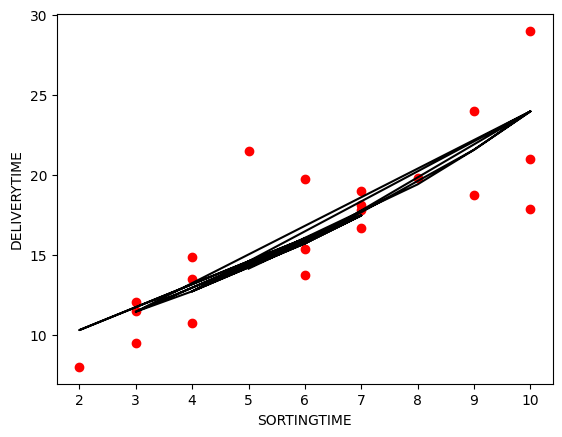

In [ ]:
plt.scatter(dl.SortingTime,dl.DeliveryTime,color='red')
plt.plot(dl.SortingTime,model_exp5_pre1,color='black')
plt.xlabel('SORTINGTIME')
plt.ylabel('DELIVERYTIME')